In [3]:
import yaml
import os

import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

from matplotlib import colormaps

# Basic reading

Particles are saved at 16 stage across the development. Right now we will just read one of them in and plot the shower front at that point

In [5]:
basedir = f"{os.environ["HOME"]}/Downloads"
particledir = f"{basedir}/28495991/particles5/"
akf = ak.from_parquet(f"{particledir}/particles.parquet")

In [6]:
with open(f"{particledir}/config.yaml") as f:
    config = yaml.safe_load(f)
    
center = np.array(config["plane"]["center"])
zhat = np.array(config["plane"]["normal"])
xhat = np.array(config["x-axis"])
yhat = np.array(config["y-axis"])

mat = np.array([xhat, yhat, zhat])

In [7]:
xyzs = np.zeros((3, len(akf)))

for idx, (x, y) in enumerate(zip(akf["x"], akf["y"])):
    xyz = np.array([x, y, 0.0])
    xyzs[:, idx] = np.matmul(mat, xyz) + center

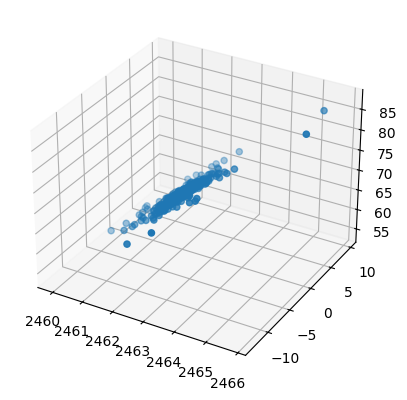

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xyzs[0, :], xyzs[1, :], xyzs[2, :])

plt.show()

# Looking at all particles across the shower

Now, I will iterate over all stages of the shower so that we can try and see the front develop.


In [12]:
particledirs = [f"{basedir}/28495991/particles{idx}" for idx in range(1, 16)] + [f"{basedir}/28495991/particles"]

tmin, tmax = np.inf, -np.inf
for particledir in particledirs:
    akf = ak.from_parquet(f"{particledir}/particles.parquet")
    tmin = min(tmin, np.min(akf["time"]))
    tmax = max(tmax, np.max(akf["time"]))

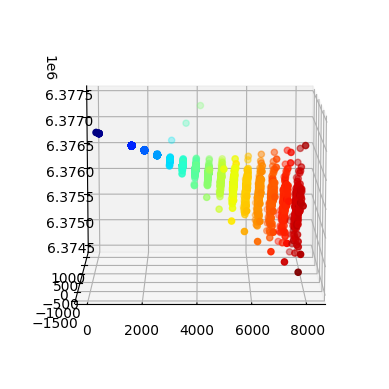

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
cmap = colormaps.get_cmap("jet")

for particledir in particledirs:
    akf = ak.from_parquet(f"{particledir}/particles.parquet")
    
    with open(f"{particledir}/config.yaml") as f:
        config = yaml.safe_load(f)
    center = np.array(config["plane"]["center"])
    zhat = np.array(config["plane"]["normal"])
    xhat = np.array(config["x-axis"])
    yhat = np.array(config["y-axis"])

    mat = np.array([xhat, yhat, zhat])
    
    xyzs = np.zeros((3, len(akf)))

    for idx, (x, y) in enumerate(zip(akf["x"], akf["y"])):
        xyz = np.array([x, y, 0.0])
        xyzs[:, idx] = np.matmul(mat, xyz) + center
    
    ax.scatter(xyzs[0, :], xyzs[1, :], xyzs[2, :], color=cmap((akf["time"] - tmin) / (tmax - tmin)))

ax.view_init(elev=10., azim=270.0)
plt.show()

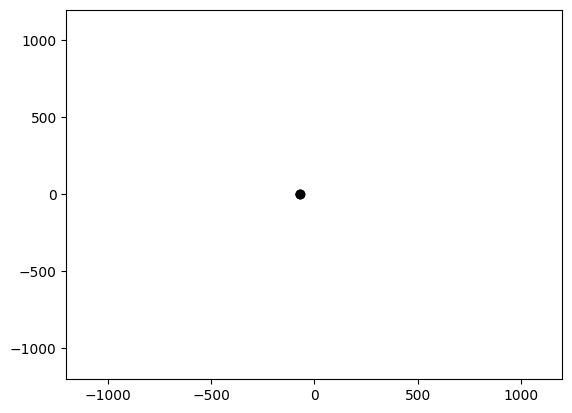

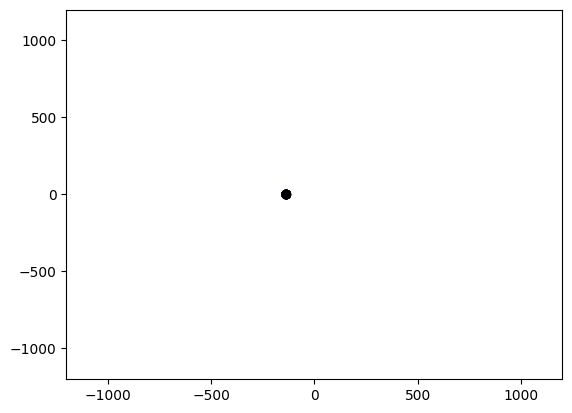

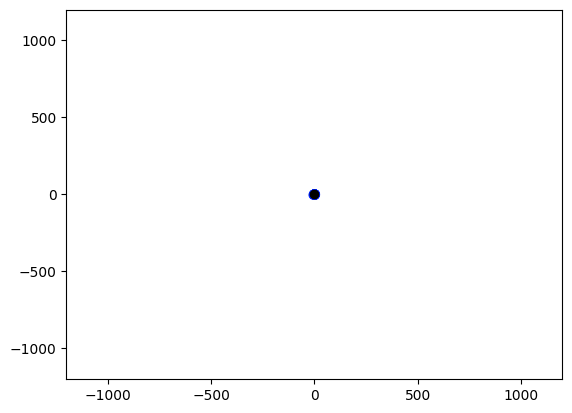

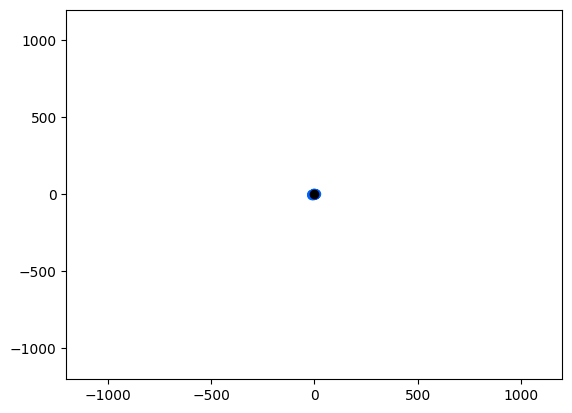

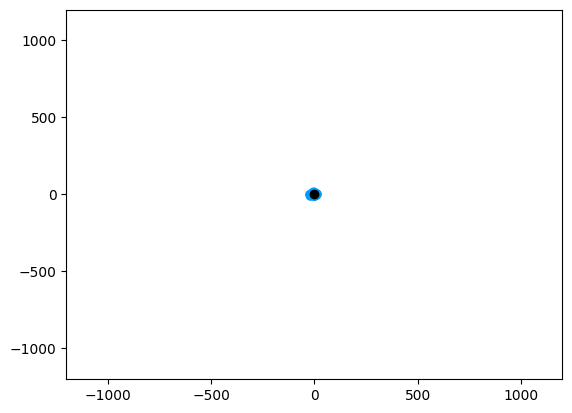

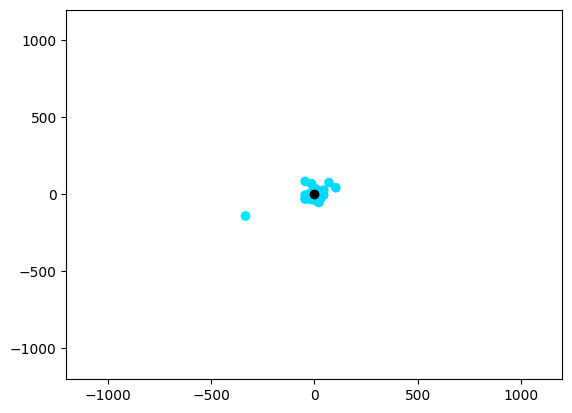

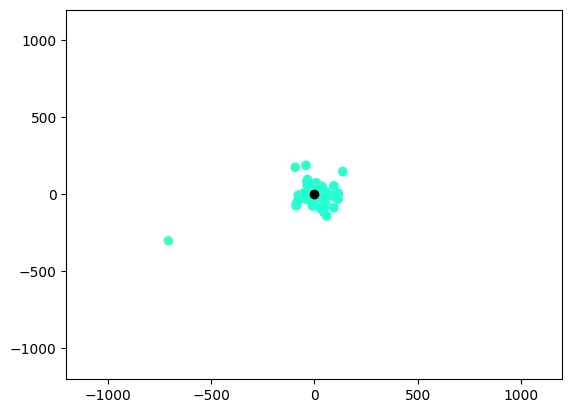

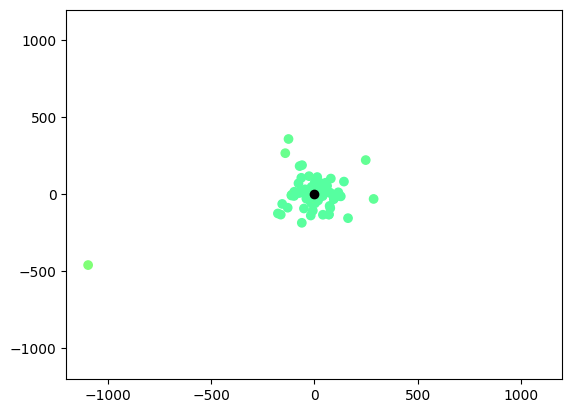

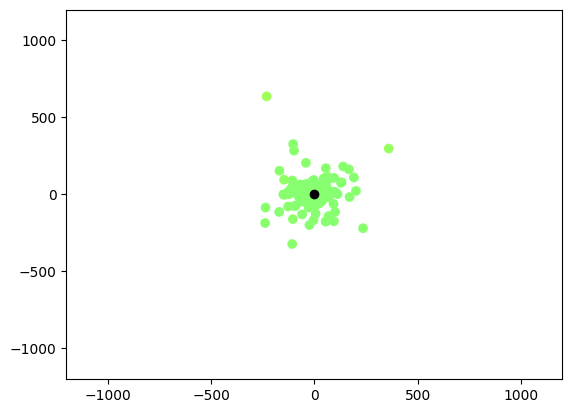

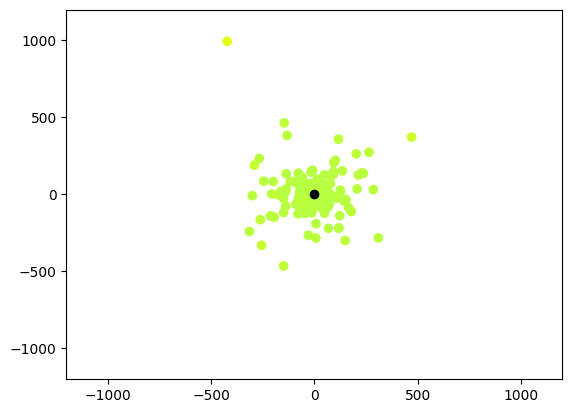

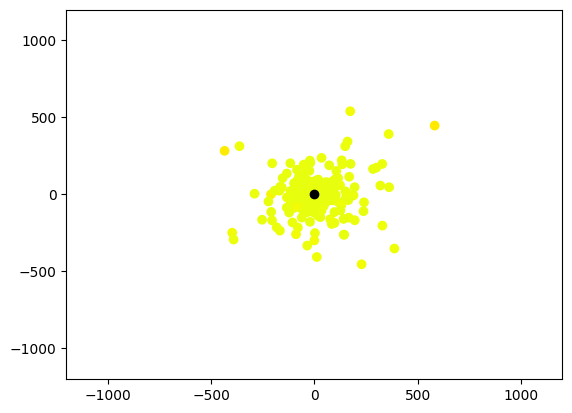

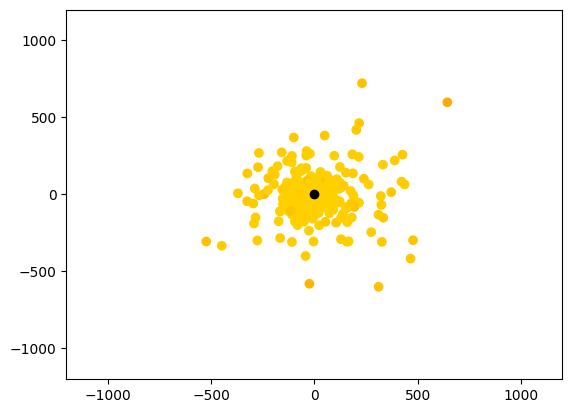

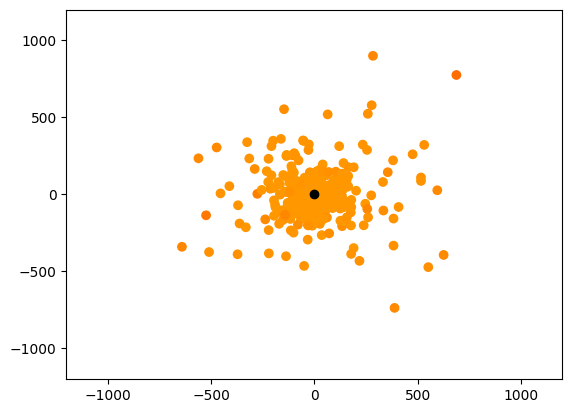

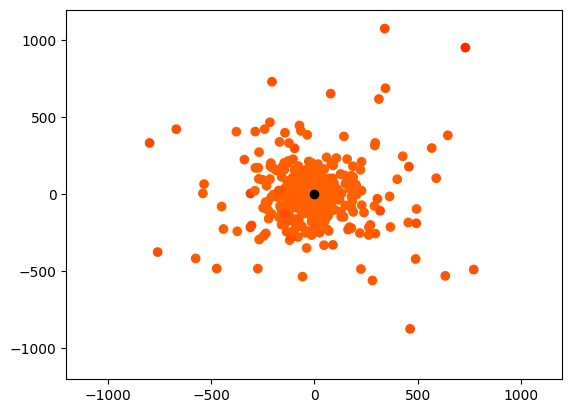

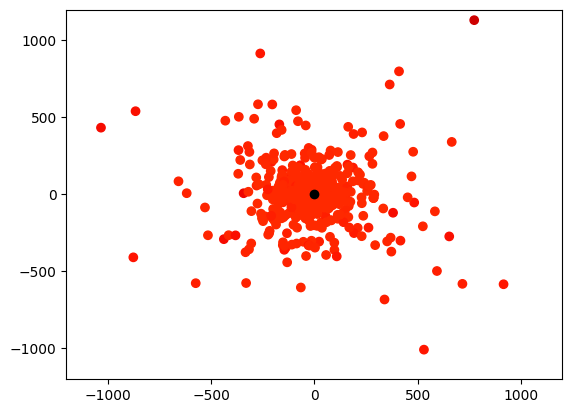

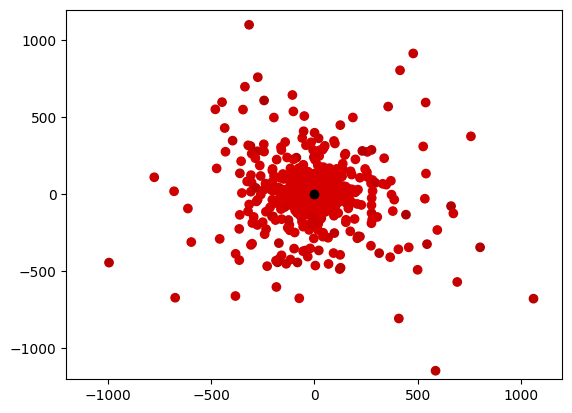

In [16]:

cmap = colormaps.get_cmap("jet")

for particledir in particledirs:
    fig, ax = plt.subplots()
    akf = ak.from_parquet(f"{particledir}/particles.parquet")
    
#     with open(f"{particledir}/config.yaml") as f:
#         config = yaml.safe_load(f)
#     center = np.array(config["plane"]["center"])
#     zhat = np.array(config["plane"]["normal"])
#     xhat = np.array(config["x-axis"])
#     yhat = np.array(config["y-axis"])

#     mat = np.array([xhat, yhat, zhat])
    
#     xyzs = np.zeros((3, len(akf)))

#     for idx, (x, y) in enumerate(zip(akf["x"], akf["y"])):
#         xyz = np.array([x, y, 0.0])
#         xyzs[:, idx] = np.matmul(mat, xyz) + center
    
    ax.scatter(
        akf["x"],
        akf["y"],
        color=cmap((akf["time"] - tmin) / (tmax - tmin))
    )
    
    ax.scatter(
        [np.median(akf["x"])],
        [np.median(akf["y"])],
        color="k"
    )

    ax.set_xlim(-1200, 1200)
    ax.set_ylim(-1200, 1200)
    plt.show()

# Another nice representation of the shower development

Be careful. This takes a long time to run

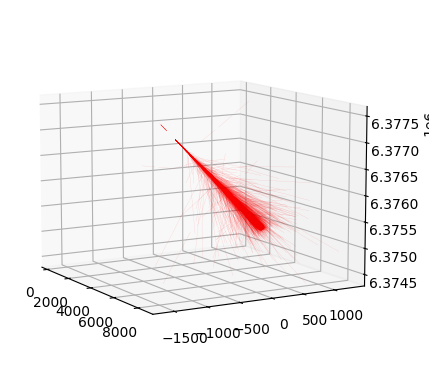

In [108]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# cmap = colormaps.get_cmap("jet")

# particledirs = [f"./Downloads/28495991/particles{idx}" for idx in range(1, 16)] + ["./Downloads/28495991/particles"]

for particledir in particledirs:
    akf = ak.from_parquet(f"{particledir}/particles.parquet")
    
    with open(f"{particledir}/config.yaml") as f:
        config = yaml.safe_load(f)
    center = np.array(config["plane"]["center"])
    zhat = np.array(config["plane"]["normal"])
    xhat = np.array(config["x-axis"])
    yhat = np.array(config["y-axis"])

    mat = np.array([xhat, yhat, zhat])
    
    xyzs = np.zeros((3, 2, len(akf)))

    for idx, (x, y, nx, ny, nz) in enumerate(zip(akf["x"], akf["y"], akf["nx"],  akf["ny"], akf["nz"])):
        
        d = np.array([nx, ny, nz])
        d = np.matmul(mat, d)
        
        xyz = np.array([x, y, 0.0])
        xyz = np.matmul(mat, xyz) + center
        xyzs[:, 0, idx] = xyz
        xyzs[:, 1, idx] = xyz + 500 * d
        
    for idx in range(0, len(akf), 1):
        ax.plot(
            xyzs[0, :, idx],
            xyzs[1, :, idx],
            xyzs[2, :, idx],
            color="red",
            lw=0.25,
            alpha=0.15
        )

ax.view_init(elev=10., azim=330.0)
plt.savefig("./shower_developing.pdf")
plt.show()